In [2]:
import numpy as np
import tensorflow as tf
from torchvision.datasets import MNIST
from keras import layers,models
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist



In [3]:
# build the dataset (train, validation and test)
def Generator(n_val=10000, n_sample=1000, sample=False):
    n_val = n_val
    n_sample = n_sample
    train,test= mnist.load_data()
    
    # data preprocessing
    x_train, x_test = train[0]/255, test[0]/255
    x_train = x_train.reshape(x_train.shape[0], -1)
    x_test = x_test.reshape(x_test.shape[0], -1)
    y_train = keras.utils.to_categorical(train[1])
    y_test = keras.utils.to_categorical(test[1])

    data_dict = {}
    if sample:
        data_dict['x_train'] = x_train[:-n_val][:n_sample]
        data_dict['y_train'] = y_train[:-n_val][:n_sample]
        data_dict['x_val'] = x_train[-n_val:][:n_sample//10]
        data_dict['y_val'] = y_train[-n_val:][:n_sample//10]
        data_dict['x_test'] = x_test[:n_sample//10]
        data_dict['y_test'] = y_test[:n_sample//10]
    else:
        data_dict['x_train'] = x_train[:-n_val]
        data_dict['y_train'] = y_train[:-n_val]
        data_dict['x_val'] = x_train[-n_val:]
        data_dict['y_val'] = y_train[-n_val:]
        data_dict['x_test'] = x_test
        data_dict['y_test'] = y_test

    return data_dict

In [4]:
data_dict = Generator(sample=False)
print('Train data shape:', data_dict['x_train'].shape)
print('Train labels shape:', data_dict['y_train'].shape)
print('Validation data shape:', data_dict['x_val'].shape)
print('Validation labels shape:', data_dict['y_val'].shape)
print('Test data shape:', data_dict['x_test'].shape)
print('Test labels shape:', data_dict['y_test'].shape)

Train data shape: (50000, 784)
Train labels shape: (50000, 10)
Validation data shape: (10000, 784)
Validation labels shape: (10000, 10)
Test data shape: (10000, 784)
Test labels shape: (10000, 10)


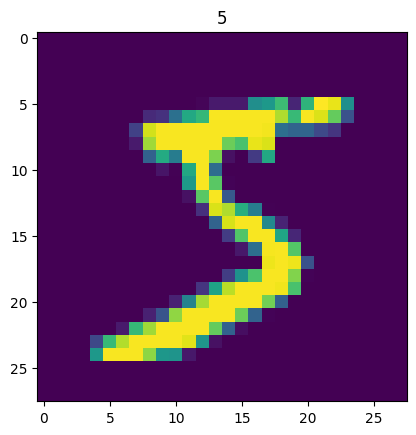

In [5]:
# plot an example
plt.imshow(data_dict['x_train'][0].reshape(28, 28))
plt.title(data_dict['y_train'][0].argmax().item())
plt.show()

Add CNN Layers:

In [10]:
model = models.Sequential()
# create a CNN model
model.add(layers.Reshape((28,28,1),input_shape=(784,)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

#MLP layer
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)        

Loss function(MSE)

In [11]:
def loss(y_train,y_pred):
    loss=tf.reduce_mean(tf.square(y_train-y_pred))
    return loss

In [12]:
from tensorflow.keras import optimizers
model.compile(loss=loss,
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [13]:
history = model.fit(data_dict['x_train'], data_dict['y_train'],
                    epochs=10,
                    batch_size=64,
                    validation_data=(data_dict['x_val'], data_dict['y_val']))

Epoch 1/10
782/782 [==============================] - 31s 38ms/step - loss: 0.0844 - acc: 0.3103 - val_loss: 0.0611 - val_acc: 0.6058
Epoch 2/10
782/782 [==============================] - 31s 40ms/step - loss: 0.0292 - acc: 0.8237 - val_loss: 0.0165 - val_acc: 0.8912
Epoch 3/10
782/782 [==============================] - 32s 41ms/step - loss: 0.0136 - acc: 0.9122 - val_loss: 0.0116 - val_acc: 0.9232
Epoch 4/10
782/782 [==============================] - 25s 32ms/step - loss: 0.0103 - acc: 0.9344 - val_loss: 0.0110 - val_acc: 0.9269
Epoch 5/10
782/782 [==============================] - 24s 31ms/step - loss: 0.0084 - acc: 0.9462 - val_loss: 0.0072 - val_acc: 0.9524
Epoch 6/10
782/782 [==============================] - 31s 40ms/step - loss: 0.0074 - acc: 0.9522 - val_loss: 0.0059 - val_acc: 0.9616
Epoch 7/10
782/782 [==============================] - 28s 35ms/step - loss: 0.0064 - acc: 0.9595 - val_loss: 0.0062 - val_acc: 0.9588
Epoch 8/10
782/782 [==============================] - 27s 34ms

In [15]:
model.save('CNN_MNIST.h5')


TSNE Graph

63/63 [==============================] - 1s 7ms/step


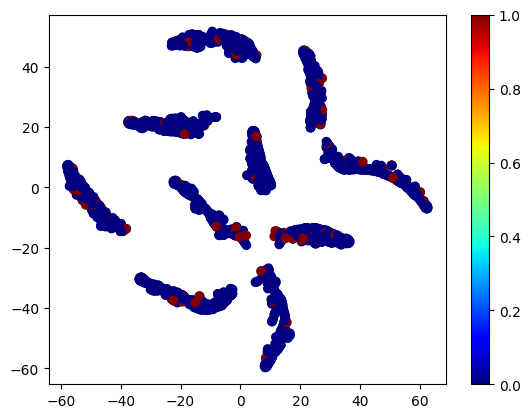

In [111]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#get embeddings
embeddings = model.predict(x_train[:2000])

# build T-SNE graph
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(embeddings)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train[:200], cmap='jet')
plt.colorbar()
plt.show()

Accuracy Chart

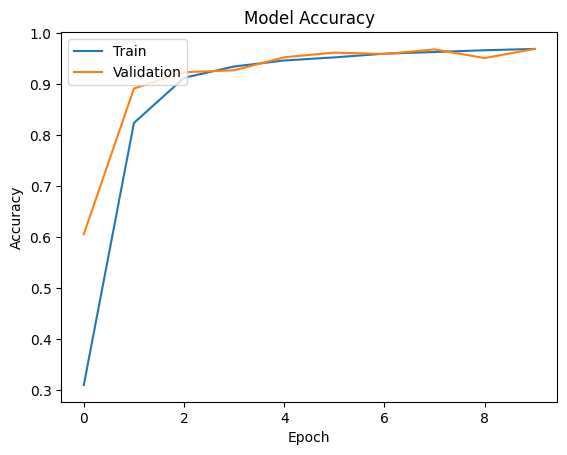

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Make predictions for specific photos

In [57]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
def prediction(img_path):
    img = load_img(img_path,color_mode ="grayscale", target_size=(28, 28))
    img_tensor = img_to_array(img)
    img_tensor = img_tensor.reshape(1, -1)
    img_tensor /= 255.0
    preds = model.predict(img_tensor)
    type=np.argmax(preds)
    plt.imshow(img)
    plt.title(type)
    plt.show()
    return preds

1/1 [==============================] - 0s 35ms/step


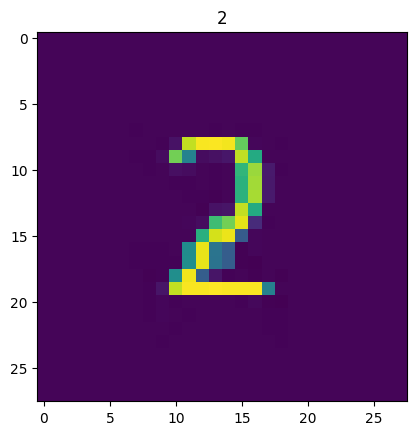

array([[5.0633139e-04, 1.8685989e-03, 8.5665369e-01, 6.1577824e-03,
        1.0641774e-04, 1.0971479e-04, 3.7776699e-04, 4.9896878e-03,
        1.2890671e-01, 3.2334993e-04]], dtype=float32)

In [61]:
prediction('0.png')